In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Data Pre-processing
- Removing irrelevant audio features
- Remove outliers (top and bottom 10%) of each audio feature

In [38]:
import pandas as pd

combined_df = []

for i in range(10):
    file_path = f'../data/processed_data/audio_features/audio_features-{i*1000}-{(i+1)*1000 - 1}.csv'
    df = pd.read_csv(file_path)
    combined_df.append(df.drop(columns=['key', 'duration_ms', 'instrumentalness']))

combined_df = pd.concat(combined_df, ignore_index=True)

# Calculate the lower and upper quantiles (25% and 75%) for each audio feature
lower_quantile = 0.10
upper_quantile = 0.90
audio_features = combined_df.columns[1:]
quantiles = combined_df[audio_features].quantile([lower_quantile, upper_quantile])

# Filter out the outliers based on the quantiles
filtered_df = combined_df.copy()
for feature in audio_features:
    lower_threshold = quantiles.loc[lower_quantile, feature]
    upper_threshold = quantiles.loc[upper_quantile, feature]
    
    filtered_df = filtered_df[(filtered_df[feature] >= lower_threshold) & (filtered_df[feature] <= upper_threshold)]

### Initial Data Visualization
Scatter plot of every audio feature against every other audio feature is generated for better visualisation

In [ ]:
# Get the list of audio features (excluding 'id' and 'danceability')
audio_features = filtered_df.columns[1:]

num_rows = 1
num_cols = len(audio_features)

subplot_size = 5
fig_row_size = subplot_size * num_cols
fig_col_size = subplot_size 

audio_features_list = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']

for af in audio_features_list:
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_row_size, fig_col_size))
    
    for i, feature in enumerate(audio_features):
        axs[i].hexbin(x=filtered_df[af], y=filtered_df[feature], alpha=1, gridsize=40, cmap='terrain')
        
        axs[i].set_xlabel(af)
        axs[i].set_ylabel(feature)
    
    plt.tight_layout()
    plt.savefig(f"../resources/audio_feature_plots/plot_{af}.png", format="png", dpi=50)
    plt.show()

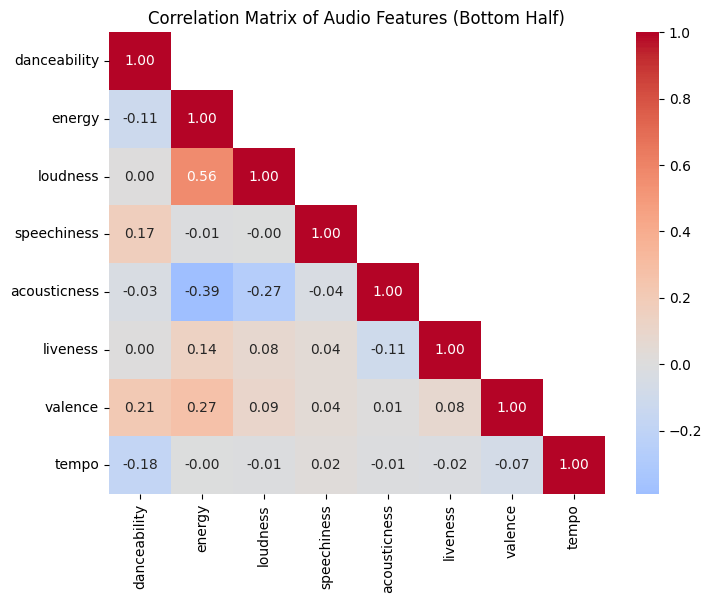

In [51]:
import numpy as np
import pandas as pd

# Assuming you have already calculated the correlation_matrix
correlation_matrix = filtered_df[audio_features_list].corr()

# Create a mask to hide the lower triangle (including the diagonal)
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

# Plotting the correlation matrix as a heatmap, showing only the values in the upper triangle
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0, mask=~mask)
plt.title("Correlation Matrix of Audio Features (Bottom Half)")
plt.show()